
# Lab 9: Random Processes

# <span style="color:blue"> In this lab session, you will learn about:</span>
- ### generating random numbers using the pseudorandom number generator (PRNG)
- ### graphing histogram
- ### estimation of probability
- ### Monte Carlo estimation
- ### 1D and 2D random walks

## Introduction to Random Processes 
A random process (also known as stochastic process) refers to a process where the outcome is probabilistic rather than deterministic in nature, that is, where there is a presence of uncertainty in the result. Stochastic processes are widely used as mathematical models of systems and phenomena that appear to vary in a random manner. Examples include an electrical current fluctuating due to thermal noise, the movement of a gas molecule as well as stock market and exchange rate fluctuations. Stochastic processes have applications in many disciplines from biology, neuroscience, image processing to telecommunications. Furthermore, seemingly random changes in financial markets have motivated the extensive use of stochastic processes in finance.

## Generating Random Numbers Using the Pseudorandom Number Generator (PRNG)

To perform any experiment or simulation in a computer that involves random processes, it is important to understand how random numbers are generated. 

1\. In a computer, random numbers are actually generated via a pseudorandom number generator or PRNG, which is an **algorithm for generating a sequence of numbers** whose properties approximate the properties of sequences of true random numbers. In other words, the  sequence of generated numbers by a PRNG is **not truly random**. 

2\. Pseudorandom number generators are also known as **deterministic generators** since the sequence is completely determined by an initial value of the PRNG, called the **seed number**. A particular pseudorandom number generator will produce the same sequence of numbers as long as the same seed number is used. This is simuilar to what you did in previous labs: given the same initial condition and system parameters, the generated sequence is always the same.

3\. In general, careful mathematical analysis is required for confidence that a PRNG generates numbers that are sufficiently random for their intended purpose. Of course, PRNGs such that those used widely in programming languages have already been thoroughly tested. Potential inherent problems in deterministic generators include:
- Shorter than expected periods for some seeds 
- Lack of uniformity of distribution across the generated values
- Correlation of successive values
- Low-dimensional distribution of the output sequence i.e. the sequence of values generated are not as independent as they seem.

4\. Python uses the [**Mersenne Twister**](https://en.wikipedia.org/wiki/Mersenne_Twister) PRNG as the core generator. It is one of the most extensively tested random number generators in existence. However, being completely deterministic, it is NOT suitable for all purposes, and is completely unsuitable for cryptographic purposes.

5\. To produce repeatable output to facilitate debugging/testing, a seed number could be specified in order to generate the same sequence of random numbers.

You could consider using the `numpy.random` submodule or the `random` module to generate random numbers. Let's look at some examples of generating random numbers.

In [1]:
# Example 1: Generating random numbers using random module and numpy.random submodule

import random as ran
import numpy.random as r

#ran.seed(10)
#r.seed(10)        # Set the seed for the PRNG: [0, 2**32 - 1] inclusive

a1 = ran.random()   # Return a float in [0.0,1.0)
print(f"Using random module: {a1}")

a2 = r.random()     # Return a float in [0.0,1.0)
print(f"Using numpy.random submodule: {a2}")

a3 = 0.5 + (3-0.5)*r.random()   # Return a float in [0.5,3)
#a3 = r.uniform(0.5,3)
print(a3)

a4 = r.random(4)    # Return 4 floats in [0.0,1.0); not possible with random() in random
print(f"Using numpy.random submodule: {a4}")

b1 = ran.randint(1,3)   # Return an integer in [1,3]; includes b
print(f"Using random module: {b1}")

b2 = r.randint(1,3)   # Return an integer in [1,3); does not include b
print(f"Using numpy.random submodule: {b2}")

c = r.randint(1,10,9)   # Return 9 uniformly distributed integers in [1,10)
print(c)                # Not possible with randint() in random

Using random module: 0.6407928403727313
Using numpy.random submodule: 0.22445608749139245
1.5019122279921886
Using numpy.random submodule: [0.7516458  0.53635373 0.12551839 0.29536757]
Using random module: 3
Using numpy.random submodule: 1
[8 3 9 7 1 9 3 4 8]


In [2]:
# Example 2: More functions in numpy.random

import numpy as np
import numpy.random as r

#r.seed(10)         # Set the seed for the PRNG: [0, 2**32 - 1] inclusive
 
arr = np.arange(10)
print(f"Before shuffling: {arr}")
r.shuffle(arr)
print(f"After shuffling: {arr}")

a1 = r.choice([1,2,3])   # Choose from 1, 2 or 3 randomly 
print(f"Random choice: {a1}")

a2 = r.choice([1,2,3],p=[0.1, 0.1, 0.8])   # With weightages or probabilities specified 
print(f"Biased choice: {a2}")

food = ['Frontier', 'The Deck', 'Techno Edge', 'Jewel','Central']
b1 = r.choice(food)
b2 = r.choice(food,2)   # Return two random choices
print(b1)
print(b2)

Before shuffling: [0 1 2 3 4 5 6 7 8 9]
After shuffling: [5 2 9 1 3 0 4 7 6 8]
Random choice: 3
Biased choice: 3
Jewel
['The Deck' 'Techno Edge']


### A look at the Monty Hall problem
What is the strategy of playing the game and the [logic](https://www.youtube.com/watch?v=4Lb-6rxZxx0) behind? 

In [3]:
# The following is taken from the codes in your lecture notes

import numpy as np
import matplotlib.pyplot as plt

# Simulate the game N times
N = 10000

# Records of winning or losing: 0 = losing, 1 = winning
stay = 0
switch = 0

# Initialize random number generator
np.random.seed()
    
for i in range(N):
    # Door choices
    doors = [1, 2, 3]
    
    # Contestant randomly selects a door
    contestant_door=np.random.randint(1,4) 
    
    # Randomly assign the car behind one of the doors
    car=np.random.randint(1,4) 
     
    doors.remove(contestant_door)
    
    if (contestant_door != car):
        doors.remove(car) 
    
    #Host reveals his chosen door
    host_OpenDoor=np.random.choice(doors) 

    if contestant_door==car:
        stay+=1
    else: 
        switch+=1

print("Winning probability by staying: ",stay/N) 
print("Winning probability by switching : ",switch/N)

Winning probability by staying:  0.3392
Winning probability by switching :  0.6608


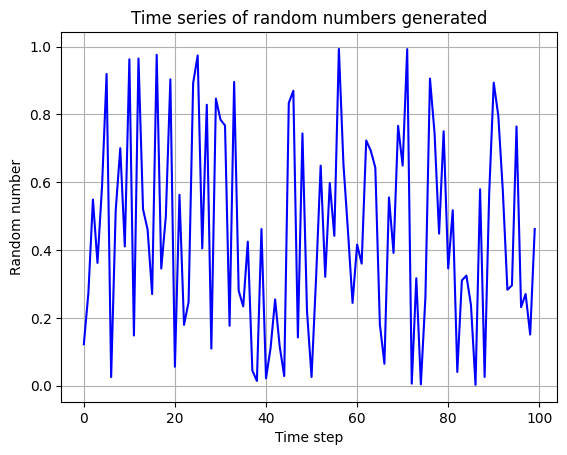

In [4]:
# Example 3: Generating a time series of the pseudorandom number generator; how can we 
# increase the uniformity of the random numbers generated?

import numpy.random as r
import matplotlib.pyplot as plt

#r.seed(10)       # Set the seed for the PRNG 
x = r.rand(100)   # Generate 100 random floats in [0,1); try 1000, 10000, 100000, 1000000

# Plot time series of the generated random numbers
plt.plot(x,"b")
plt.title("Time series of random numbers generated")
plt.xlabel("Time step"); plt.ylabel("Random number")
plt.grid(True)
plt.show()

## Histogram plot
A histogram may resemble a bar graph but they are [different](https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts). A histogram displays numerical data by grouping data into "bins" of equal width typically. Each bin is plotted as a bar whose height corresponds to the number of data points that fall within the bin. In other words, a histogram is a graph showing frequency distributions. 

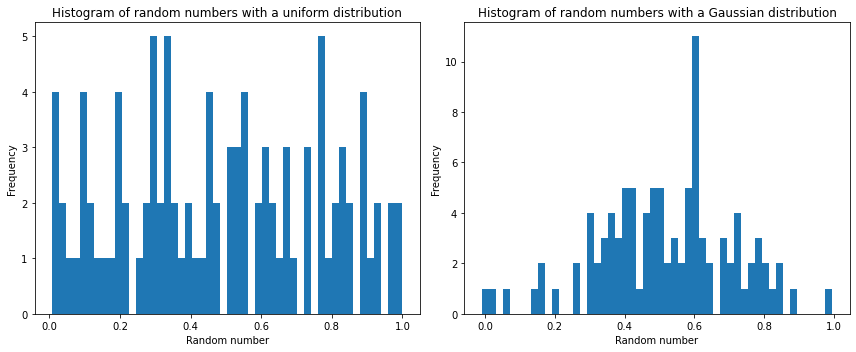

In [540]:
# Example 3: Histogram plots to compare between uniform and normal distributions of random numbers generated

import numpy.random as r
import matplotlib.pyplot as plt

# Generate random number 
seed = 777    # Set seed number
N = 100        # Specify the number of random numbers to generate
mean = 0.5    # Mean of normal(Gaussian) distribution
stdev = 0.2   # Standard deviation

r.seed(seed)     # If the seed number is not specified, a random seed will be used by Python
xu = r.rand(N)   # Return N number of floats in [0, 1) with a uniform distribution
xn = r.normal(mean,stdev,N)   # Return N number of floats in [0, 1) with a normal distribution

# Plot histograms of random numbers generated
bins = 50   # Specify the number of bins in the histogram

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(xu,bins)
plt.title("Histogram of random numbers with a uniform distribution")
plt.xlabel("Random number"); plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(xn,bins)
plt.title("Histogram of random numbers with a Gaussian distribution")
plt.xlabel("Random number"); plt.ylabel("Frequency")

plt.tight_layout()
plt.show()   

# As N increases, the distributions become more uniform and Gaussian respectively

## Probability and Random Variables

In simulating a random process or experiment, the outcome cannot be determined in advance. For example, the outcome of a single toss of an unbiased coin can be either Head or Tail. We can define a random variable "X" to have 0 and 1 as the possible values:

<img src="https://www.physics.nus.edu.sg/~phyngsy/cos2k/lab-1/tossing-coin-rand-variable.png" width=200 height=200/>

This set of possible values is also known as the sample space (e.g. in tossing a coin, $X = \{0,1\}$) and the random variable can take on any of its values randomly. The **probability** of any one value of X is notated as

$$P(X = value) = probability \ of \ that \ value$$
    
The probability tells us about the likelihood of an event. Mathematically,

$$Probability \ of \ an \ event \ happening = \frac{Number \ of \ ways \ it \ can \ happen}{Total \ number \ of \ outcomes}$$

<img src="https://www.physics.nus.edu.sg/~phyngsy/cos2k/lab-1/probability-line.png" width=350 height=350 />

Thus, a probability should range from **0 to 1**. For instance, we have, for the experiment of a single toss of a fair coin,

  $$P(X = 0) = 1/2 = 0.50$$
  $$P(X = 1) = 1/2 = 0.50$$


Probability is just a guide and it does not tell us exactly what will happen. If you toss a coin 100 times, how many Heads will come up? Probability says that Heads have a $1/2$ chance, so we can expect 50 Heads. But when we actually carry out the experiment of tossing the coin, we might get 48 Heads, or 55 Heads ... or anything really, but in most cases it will be a number near 50. We can therefore **estimate** the probability of obtaining a certain result by observing its relative frequency: 

$$ Relative \ frequency = \frac{Frequency}{N} $$.

For instance, the frequency can be the number of times of getting Heads and $N$ is the total number of tosses (experiments). If the number of repetition of the experiment becomes larger and larger ($N$ approaches infinity), the estimation becomes more accurate. The **relative frequency of the event is defined as the probability of that event**, that is, 

$$ Probability \ of \ an \ event \ happening = \lim\limits_{N \to \infty} \frac{Frequency}{N}.$$

This forms the basis of the Monte Carlo estimation.

## Monte Carlo Estimation
Monte Carlo estimation is a numerical method for estimating mathematical quantities through repeated random sampling or simulation of random variables. They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches.

For example, in the estimation of an area, if we uniformly distribute random points across, the number of points landing in a subregion must be proportional to its area. Hence, the frequency of random hits becomes a proxy for estimating areas. An exact analogy is that the larger the cross sectional area of a bucket, the more rainwater it can proportionally collect. This idea can of course be generalised to volumes too.

In [544]:
# Example 4: Tossing a fair coin

import numpy.random as r

# Prompt for input of number of tosses
nToss = eval(input("Enter the number of tosses: "))

nHead, nTail = [0,0]   # Keep track of the number of heads and tails

# Deciding whether it is a Head or Tail 
for n in range(nToss):
    p = r.random()     # Generate a float in [0, 1)  
    if (p < 0.5):
        nHead+=1
    else:
        nTail+=1
        
# Print and evaluate the chance of getting a Head or Tail
print(f"Probability of getting a head = {nHead/nToss}")
print(f"Probability of getting a tail = {nTail/nToss}")

Enter the number of tosses: 10
Probability of getting a head = 0.4
Probability of getting a tail = 0.6


Enter the number of points to be used in the simulation: 10
Area of rectangle from theory = 0.28000 unit square
Area of rectangle from simulation = 0.10000 unit square


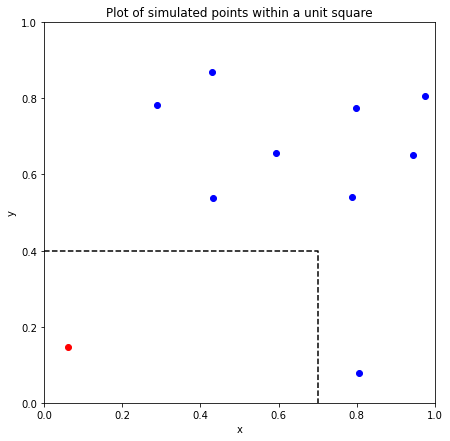

In [550]:
# Example 5: Monte Carlo method to estimate the area of a rectangle within a unit square

import numpy as np
import matplotlib.pyplot as plt

# Prompt for input of number of points
nPoints = eval(input("Enter the number of points to be used in the simulation: "))

width = 0.7    # Rectangle's width
height = 0.4   # Rectangle's height

# Initialisation
nRect = 0          # Number of random points in the rectangle
ix = []; iy = []   # Coordinates of points within the rectangle
ox = []; oy = []   # Coordinates of points outside the rectangle  

# Iterate across all points and check if point lies within or outside the specified rectangle
for n in range(nPoints):
    x = np.random.rand()
    y = np.random.rand()
    if(x <= width) and (y <= height):    # Point lies within the rectangle
        nRect+=1
        ix.append(x)
        iy.append(y)
    else:                                # Point lies outside the rectangle
        ox.append(x)
        oy.append(y)
        
# Compare area from Monte Carlo simulation with actual area
print(f"Area of rectangle from theory = {width*height:.5f} unit square")
print(f"Area of rectangle from simulation = {nRect/nPoints:.5f} unit square")

plt.figure(1,(7,7)) 
plt.plot(ix,iy,"ro")   # Plot points within the rectangle
plt.plot(ox,oy,"bo")   # Plot points outside the rectangle
plt.plot([0,width,width],[height,height,0],"k--")   # Draw rectangle
plt.title('Plot of simulated points within a unit square')
plt.xlabel("x")
plt.ylabel("y")    
plt.xlim(0,1); plt.ylim(0,1)
plt.show()

Enter the number of points to be used in the simulation: 10
Actual value of pi = 3.14159
Monte Carlo estimation of pi = 3.20000


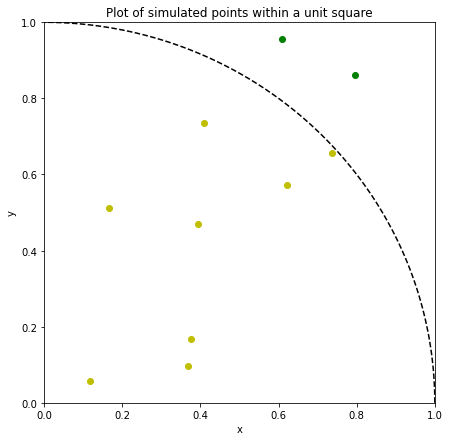

In [575]:
# Example 6: Monte Carlo method to estimate the area of a quarter circle within a unit square
# and hence pi

import numpy as np
import matplotlib.pyplot as plt

# Prompt for input of number of points
nPoints = eval(input("Enter the number of points to be used in the simulation: "))

# Initialisation
nCircle = 0         # Number of random points in the 1st quadrant of a circle
ix = []; iy = []    # Coordinates of points within the quadrant
ox = []; oy = []    # Coordinates of points outside the quadrant  

# Iterate across all points, and check if point lies within or outside the quadrant
for n in range(nPoints):
    x = np.random.rand()
    y = np.random.rand()
    if(x*x + y*y <= 1.0):   # Point lies within the quadrant
        nCircle+=1
        ix.append(x)
        iy.append(y)
    else:                   # Point lies outside the quadrant
        ox.append(x)
        oy.append(y)
        
# Compare pi from Monte Carlo simulation with actual pi
print(f"Actual value of pi = {np.pi:.5f}")

# Based on area of quadrant/area of square = (pi x radius^2)/4, radius = 1 unit
print(f"Monte Carlo estimation of pi = {4.0*nCircle/nPoints:.5f}")   

plt.figure(1,(7,7))
plt.plot(ix,iy,"yo") 
plt.plot(ox,oy,"go")
plt.title('Plot of simulated points within a unit square')
plt.xlabel("x")
plt.ylabel("y")    

angle = np.linspace(0, np.pi/2, 100) 
radius = 1.0
x = radius * np.cos(angle)   # An (x,y) point on a circle is related to the radius of the circle  
y = radius * np.sin(angle)   # via trigonometry
 
plt.plot(x,y,"k--")
plt.xlim(0,1); plt.ylim(0,1)
plt.show() 

## Random Walks
Random walks are random processes that describe a path consisting of a succession of random steps away from the origin. It can be used for modeling diverse processes such as that involving diffusion of molecules to the spread of random opinions, provided there is no definite directions or tendencies/agenda. An elementary example of a random walk is the 1D random walk on the integer number line, which starts at 0 and at each step moves  +1  or  −1.

[0, -1, 0, 1, 0, -1, -2, -1, -2, -3, -4, -5, -4, -5, -4, -3, -2, -1, 0, -1, 0, -1, -2, -1, 0, -1, -2, -1, -2, -3, -4, -3, -2, -3, -2, -3, -2, -3, -2, -1, 0, 1, 2, 1, 2, 3, 2, 3, 4, 5, 4, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 4, 3, 4, 3, 4, 5, 4, 3, 2, 3, 4, 3, 4, 3, 2, 1, 2, 1, 2, 1, 0, -1, -2, -3, -4, -3, -2, -1, -2, -1, -2, -1, 0, 1, 0, -1, -2, -1, 0]


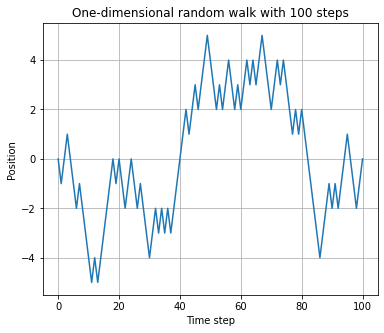

In [553]:
# 1D random walk 

import numpy.random as r 
import numpy as np 
import matplotlib.pyplot as plt

n = 100   # Number of steps
start = 0
positions = [start]

p = 0.5   # Probability that move=1 i.e. that a step is taken upwards. 

for i in range(n):
    rr = r.rand()
    if rr < p:
        move = 1    # With probability p (upwards)
    else:
        move = -1   # With probability 1-p (downwards)
        
    new_position = positions[i] + move
    positions.append(new_position)

print(positions)    
plt.figure(figsize=(6,5))
plt.plot(positions)
plt.title(f"One-dimensional random walk with {n} steps")
plt.xlabel("Time step")
plt.ylabel("Position")        
plt.grid()
plt.show()

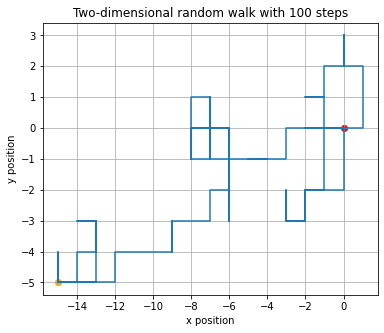

In [560]:
# 2D random walk

import numpy.random as r 
import numpy as np 
import matplotlib.pyplot as plt

n = 100   # Number of steps

x = np.zeros(n+1,int)   # x and y are arrays which store the coordinates of the position 
y = np.zeros(n+1,int) 
direction=["NORTH","SOUTH","EAST","WEST"]   # Assuming four directions of movement

for i in range(1,n+1): 
    step = r.choice(direction)   # Randomly choosing the direction of movement 
    if step == "EAST":   
        x[i] = x[i - 1] + 1   # Update direction along x
        y[i] = y[i - 1]       # Update direction along y
    elif step == "WEST": 
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1] 
    elif step == "NORTH": 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] + 1
    else: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] - 1

plt.figure(figsize=(6,5))
plt.plot(x,y)
plt.scatter(x[0],y[0], c='r', marker='o')   # Plot first point of simulation
plt.scatter(x[-1],y[-1], c='orange', marker='o')   # Plot last point of simulation
plt.title(f"Two-dimensional random walk with {n} steps")
plt.xlabel("x position")
plt.ylabel("y position")        
plt.grid()
plt.show()

[ 0.  0. -1.  0. -1.  1.  0.  1.  0.  0.  0.  0.  0.  0. -1. -1.  1.  1.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0. -1. -1.  0.  0.  0.  1. -1.  0.
  0.  0. -1.  0. -1.  0.  1. -1.  0.  0.  0. -1.  0.  0. -1.  0.  0.  0.
  0. -1.  1.  0.  0.  0. -1.  0.  1. -1.  0.  0.  0. -1. -1. -1.  0. -1.
  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
[ 1.  1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  1.  0.  0. -1.  0.  0. -1.  0.  0.  0.  0.  0.  1. -1.  0.  1.  0.  1.
  1.  0.  0.  0.  1.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
 -1.  1.  0.  1.  0.  0.  0.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.
  1.  0.  0. -1.  0.  1.  0. -1. -1. -1.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1. -1.  0.  1.  1.  1.  0. -1.  0.  0. -1.  0.  1.  0.
  0.  1.  0. -1.  0.  1.  1.  0.  1.  0.

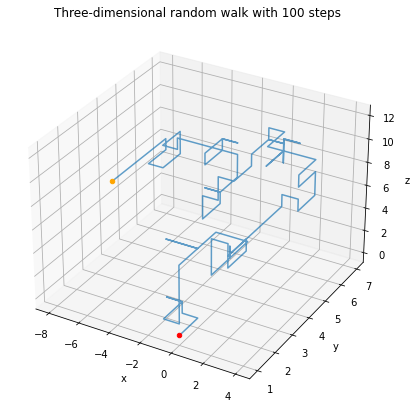

In [561]:
# 3D random walk (Optional)

import numpy as np
import matplotlib.pyplot as plt

N = 100
R = (np.random.rand(N)*6).astype("int")   # Randomly generate 6 integers [0,6) N times
x = np.zeros(N) 
y = np.zeros(N)
z = np.zeros(N)

x[ R==0 ] = -1; x[ R==1 ] = 1   # Assign step along the x direction according to the R generated
y[ R==2 ] = -1; y[ R==3 ] = 1   # Assign step along the y direction according to the R generated
z[ R==4 ] = -1; z[ R==5 ] = 1   # Assign step along the z direction according to the R generated

print(x)
print(y)
print(z)

x = np.cumsum(x)   # Get cumulative sum of the steps across each axis
y = np.cumsum(y)
z = np.cumsum(z)

print(x)
print(y)
print(z)

plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')   # Return a 3D axis object
ax.plot3D(x, y, z, alpha=0.7)    # Alpha sets the darkness of the path
ax.scatter(x[0],y[0],z[0], c='r', marker='o')   # Plot first point of simulation
ax.scatter(x[-1],y[-1],z[-1], c='orange', marker='o')   # Plot last point of simulation

ax.set_title(f"Three-dimensional random walk with {n} steps")
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
plt.show()

## Further Practice

### Question 1:
With reference to Example 6, modify the program such that the pi is esitmated based on a full circle instead of a quarter circle.

### Question 2:
Write a program to simulate a 2D random walk in the upward, downward, rightward and leftward direction. For each step, the likelihood of making an upward or rightward move is doubled that of making a downward or leftward move (upward move has same likelihood as rightward move and downward move has same likelihood as leftward move). Prompt for an input of the number of steps to be taken. Assuming the starting position is (0,0), display the walk visually and output the final position (x,y) of the walk. 

### References

1. [Generate pseudo-random numbers](https://docs.python.org/3/library/random.html)
2. [numpy.random.rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)
3. [Matplotlib Histograms](https://www.w3schools.com/python/matplotlib_histograms.asp)
4. [Monte Carlo Simulation](https://medium.com/@thisismetis/what-is-a-monte-carlo-simulation-part-1-32c01b48cc49)
5. [Random Walk (Implementation in Python)](https://www.geeksforgeeks.org/random-walk-implementation-python/)